In [35]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

In [36]:
data= pd.read_csv('heart_2020_cleaned.csv')
print(data.shape)

(319795, 18)


In [37]:
print(data.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [39]:
print(data.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [40]:
print(data.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [41]:
data2= pd.DataFrame(data).dropna()

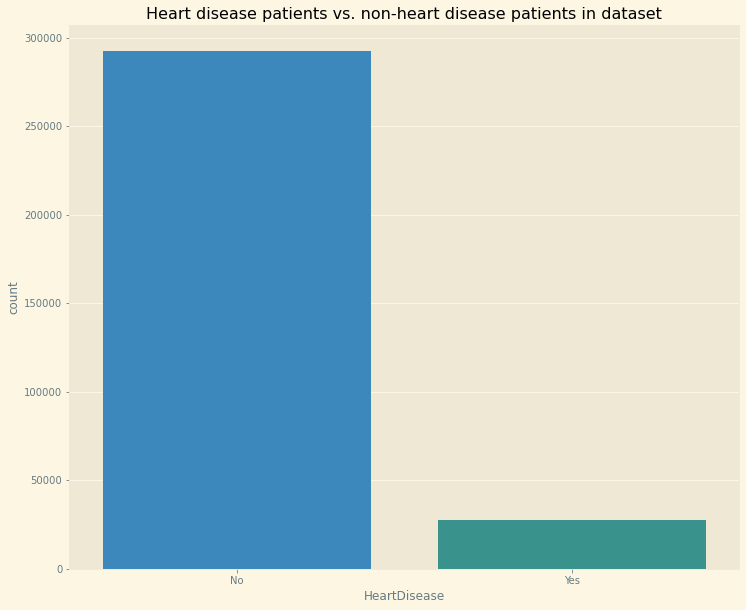

In [42]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 10))
plt.title('Heart disease patients vs. non-heart disease patients in dataset')
sb.countplot(x='HeartDisease', data=data2)
plt.show()

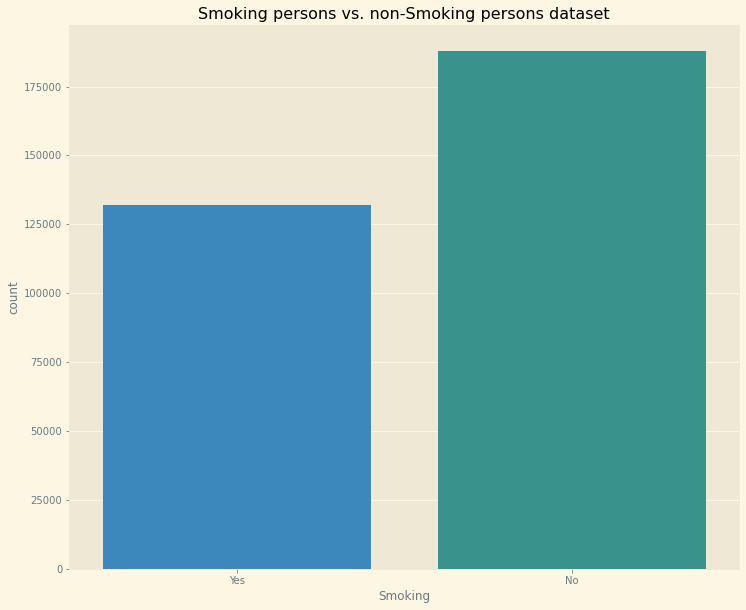

In [43]:
plt.figure(figsize=(12, 10))
plt.title('Smoking persons vs. non-Smoking persons dataset')
sb.countplot(x='Smoking', data=data2)
plt.show()

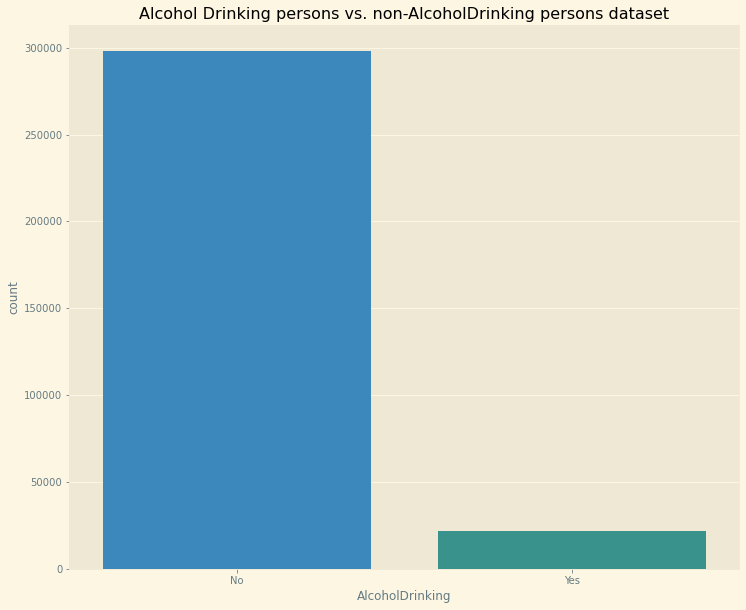

In [44]:
plt.figure(figsize=(12, 10))
plt.title('Alcohol Drinking persons vs. non-AlcoholDrinking persons dataset')
sb.countplot(x='AlcoholDrinking', data=data2)
plt.show()

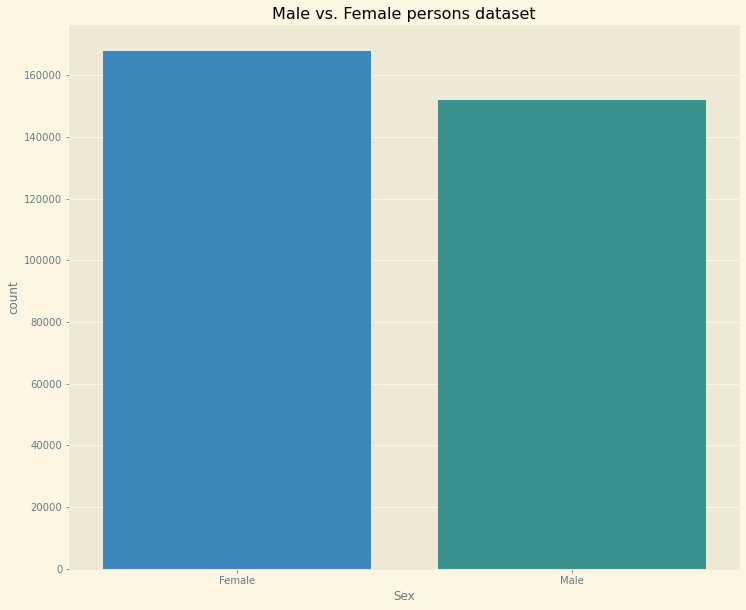

In [45]:
plt.figure(figsize=(12, 10))
plt.title('Male vs. Female persons dataset')
sb.countplot(x='Sex', data=data2)
plt.show()

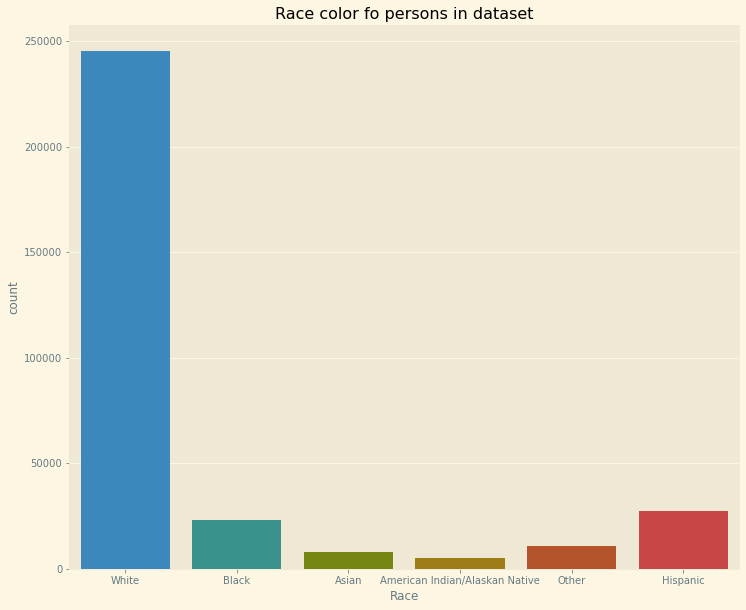

In [46]:
plt.figure(figsize=(12, 10))
plt.title('Race color fo persons in dataset')
sb.countplot(x='Race', data=data2)
plt.show()

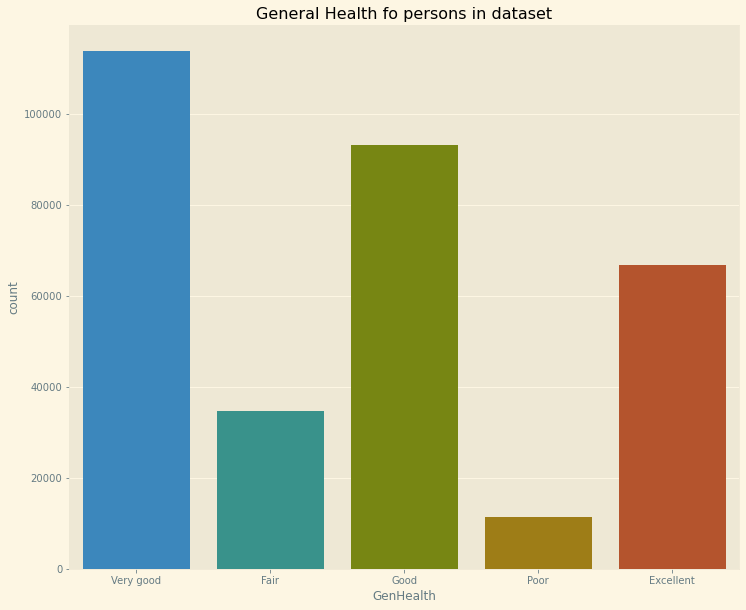

In [47]:
plt.figure(figsize=(12, 10))
plt.title('General Health fo persons in dataset')
sb.countplot(x='GenHealth', data=data2)
plt.show()

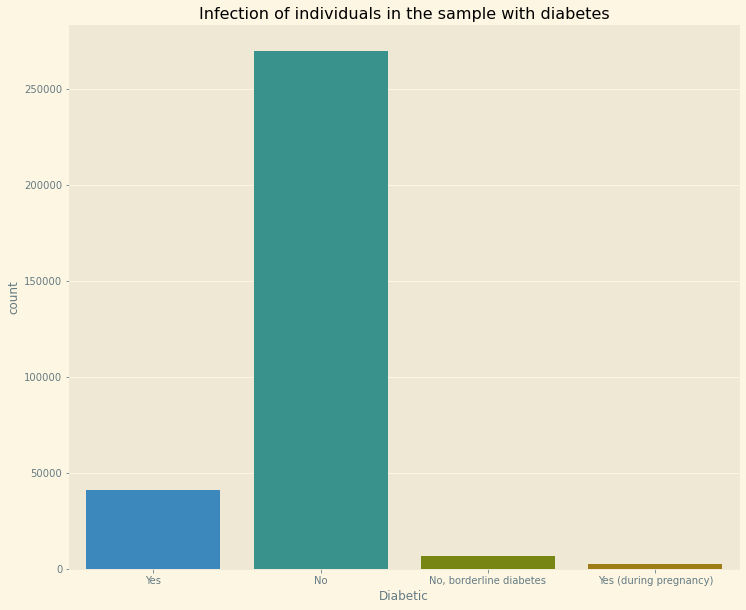

In [48]:
plt.figure(figsize=(12, 10))
plt.title('Infection of individuals in the sample with diabetes')
sb.countplot(x='Diabetic', data=data2)
plt.show()

In [49]:
le = LabelEncoder()
data2['HeartDisease'] = le.fit_transform(data2['HeartDisease'])
data2['Smoking'] = le.fit_transform(data2['Smoking'])
data2['AlcoholDrinking'] = le.fit_transform(data2['AlcoholDrinking'])
data2['Stroke'] = le.fit_transform(data2['Stroke'])
data2['DiffWalking'] = le.fit_transform(data2['DiffWalking'])
data2['Sex'] = le.fit_transform(data2['Sex'])
data2['PhysicalActivity'] = le.fit_transform(data2['PhysicalActivity'])
data2['Asthma'] = le.fit_transform(data2['Asthma'])
data2['KidneyDisease'] = le.fit_transform(data2['KidneyDisease'])
data2['SkinCancer'] = le.fit_transform(data2['SkinCancer'])

In [50]:
data2 = pd.get_dummies(data2, columns = ['AgeCategory', 'Race',  'Diabetic', 'GenHealth'])

In [51]:
data2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,1,0,0,1,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,1,1,0,0,0,0,0,0,0,1


In [52]:
x= data2.drop('HeartDisease',axis=1)
y=data2['HeartDisease']
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [53]:
print(x.shape)

(319795, 41)


In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(x_train, y_train)

C:\abdelrahman\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = lr.predict(x_train)

In [57]:
print('The training accuracy is', lr.score(x_train, y_train)*100)
print('The test accuracy is', lr.score(x_test, y_test)*100)

The training accuracy is 91.61782574512186
The test accuracy is 91.4935531952595


In [58]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.96    204774
           1       0.54      0.12      0.19     19082

    accuracy                           0.92    223856
   macro avg       0.73      0.55      0.57    223856
weighted avg       0.89      0.92      0.89    223856



In [67]:
from imblearn.under_sampling import RandomUnderSampler

In [68]:
undersample = RandomUnderSampler(sampling_strategy="majority")
X_under, y_under = undersample.fit_resample(x, y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=1000)

In [70]:
lr_us = LogisticRegression(max_iter=200)
lr_us.fit(X_train, y_train)

C:\abdelrahman\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [71]:
y_pred_us = lr_us.predict(X_train)
print(classification_report(y_train, y_pred_us))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     19142
           1       0.75      0.78      0.77     19180

    accuracy                           0.76     38322
   macro avg       0.76      0.76      0.76     38322
weighted avg       0.76      0.76      0.76     38322



In [73]:
print('The training accuracy is', lr_us.score(X_train, y_train)*100)
print('The test accuracy is', lr_us.score(X_test, y_test)*100)

The training accuracy is 76.31125724127133
The test accuracy is 76.82050657574283
